### Repaso de representación de número flotante 

In [49]:
using Plots

Recordemos que los números flotantes tienen la forma:

$$
x = (-1)^s * 0.a_1a_2a_3 \ldots a_t * \beta^e = (-1)^s * m * \beta^e, \;\;\;\;\;\; \frac{1}{\beta} < m < 1
$$

Donde el primer elemento, $a_1$ es no nulo (distinto de cero). En el caso de la representación binaria, $\beta=2$, tendremos que necesariamente $a_1=1$ y por lo tanto no lo incluiremos.

## Ejemplo de representación de número en punto flotante simple (Float32) ##

Consideremos el número: x = -118.625

Su representación binaria es: x_bin = -1110110.101

Lo chequeamos:

In [113]:
-(2^6+2^5+2^4+2^2+2^1+2^(-1)+2^(-3))

-118.625

Para pasarlo a la representación de punto flotante 32, primero corremos la coma hasta el primer lugar no nulo de la izquierda (7 lugares):


$x_{bin} = (-1)^1*(0.1110110101)*2^7$

Como $7$ en binario es: `111` Pero debemos usar la *representación sesgada* y por lo tanto ir a $E = 126+7 = 133$ que se representa como: `10000101`

In [114]:
2^2+2^1+2^0

7

In [115]:
2^7+2^2+2^0

133

Como el primer elemento de la mantiza debe ser necesariamente no nulo debe ser un 1, que se omite.
La representación será: 

`x_float32 = 1_10000101_110110101000`

In [116]:
fl_x = Float32(-118.625)

-118.625f0

In [117]:
bitstring(fl_x)

"11000010111011010100000000000000"

### Ejemplo con F(2,3,-1,2)

$\beta = 2$, $t = 3$, $L=-1$ y $U=2$ (sesgado por dos unidades, $E = e + L + 1$)

Listemos primero los **normalizados** (los positivos solamente):


![todos los positivos](F23m12.png)

In [128]:
L = -1
U = 2
β = 2.

for j in 0:(β-1)
    for k in 0:(β-1)
        for e in L:U
            println((β^(-1) + j*β^(-2) + k*β^(-3))*β^e)
        end
    end
end

0.25
0.5
1.0
2.0
0.3125
0.625
1.25
2.5
0.375
0.75
1.5
3.0
0.4375
0.875
1.75
3.5


Ahora los ordenamos para graficarlos:

In [129]:
x_fln = zeros(2*2*4) # 16 lugares

for j in 0:(β-1)
    for k in 0:(β-1)
        for e in L:U
            x_fln[Int(1+ 2*j+ k +4*(e-L))] = (β^(-1) + j*β^(-2) + k*β^(-3))*β^e
        end
    end
end

In [130]:
x_fln

16-element Vector{Float64}:
 0.25
 0.3125
 0.375
 0.4375
 0.5
 0.625
 0.75
 0.875
 1.0
 1.25
 1.5
 1.75
 2.0
 2.5
 3.0
 3.5

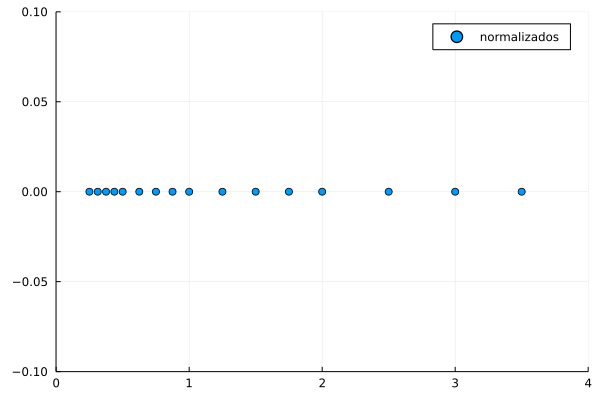

In [131]:
cero(x) = 0.0
scatter(x_fln,cero.(x_fln), xlim=(-0.001,4.0), ylim=(-0.1,0.1), label="normalizados")

## Números especiales

Dada una representación $\mathcal{F}(\beta, t, L, U)$

Además de los números ya incluidos las representaciones modernas (IEEE754) agregan varios más:

1. El cero: mantiza 0 y e = (L-1)

2. Números denormalizados ($a_1$ puede ser cero) y e = (L-1). Cubren la región cercana a zero.

3. Inf y -Inf resultados de dividir por cero o de overflow (positivo y negativo) mantiza nula y e = U+1

4. NaN que son resultados ilegales, como por ejemplo `0/0`




![operaciones](Inf_y_otros.png)

![otros números](Otros_numeros.png)


In [159]:
1/0

Inf

In [160]:
bitstring(Inf)

"0111111111110000000000000000000000000000000000000000000000000000"

Ahora veamos cuales son los **desnormalizados** de la representación $\mathcal{F}(2, 3, -1, 2)$:

![desnormalizados](F23m12_des.png)



In [137]:
x_fld = zeros(4)
for j in 0:1
    for k in 0:1
            x_fld[1+k+2*j] = (0 + j*β^(-2) + k*β^(-3))*β^(L)
    end
end

In [138]:
x_fld

4-element Vector{Float64}:
 0.0
 0.0625
 0.125
 0.1875

In [139]:
3/16 

0.1875

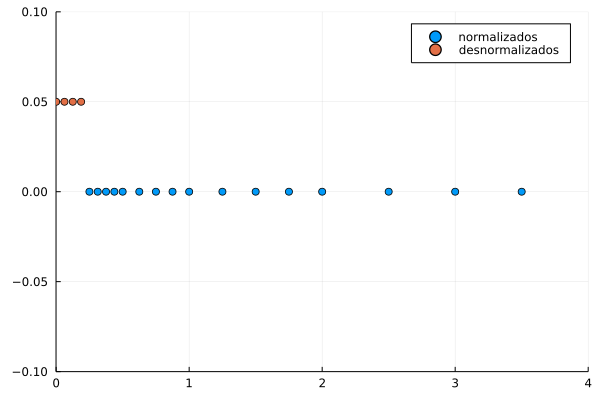

In [140]:
scatter(x_fln,cero.(x_fln), xlim=(-0.001,4.0), ylim=(-0.1,0.1), label="normalizados")
scatter!(x_fld,cero.(x_fld).+0.05, label="desnormalizados")

![Espaciamiento entre números en F(2,3,-1,2)](F23m12_list.png)

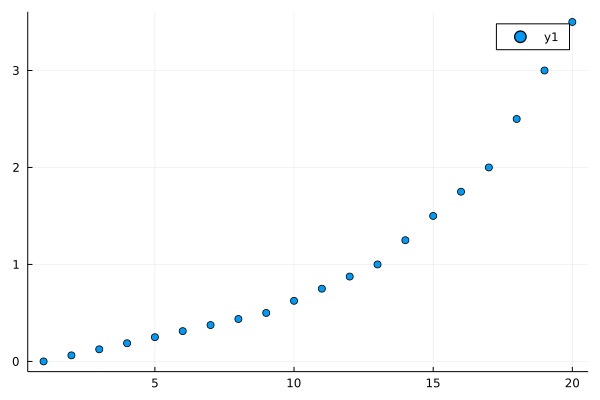

In [141]:
scatter([x_fld;x_fln])

### Los ceros

In [118]:
bitstring(0.0)

"0000000000000000000000000000000000000000000000000000000000000000"

Hay por lo tanto dos ceros....

In [119]:
bitstring(-0.0)

"1000000000000000000000000000000000000000000000000000000000000000"

In [161]:
1/(-0.)

-Inf

### Distancia entre números consecutivos:

La distancia entre dos números consecutivos en el intervalo $x \in [\beta^e, \beta^{e+1})$: 

$$
\epsilon(x) = \frac{1}{\beta^{t}}* \beta^{e+1} = \beta^{e-t+1}
$$

La distancia al número más cercano a 1 (POR ARRIBA) es $\epsilon(1) = \beta^{1-t}$ (ya que $1 = 0.1\beta^1$)

La distancia a un número se denomina $\epsilon$ y depende de la representación que la máquina y el software haga de los números.

En Julia (*en FORTRAN también*) hay una función que nos devuelve el valor de esta distancia para cada número que le demos:

In [1]:
?eps()

```
eps(::Type{T}) where T<:AbstractFloat
eps()
```

Return the *machine epsilon* of the floating point type `T` (`T = Float64` by default). This is defined as the gap between 1 and the next largest value representable by `typeof(one(T))`, and is equivalent to `eps(one(T))`.  (Since `eps(T)` is a bound on the *relative error* of `T`, it is a "dimensionless" quantity like [`one`](@ref).)

# Examples

```jldoctest
julia> eps()
2.220446049250313e-16

julia> eps(Float32)
1.1920929f-7

julia> 1.0 + eps()
1.0000000000000002

julia> 1.0 + eps()/2
1.0
```

---

```
eps(x::AbstractFloat)
```

Return the *unit in last place* (ulp) of `x`. This is the distance between consecutive representable floating point values at `x`. In most cases, if the distance on either side of `x` is different, then the larger of the two is taken, that is

```
eps(x) == max(x-prevfloat(x), nextfloat(x)-x)
```

The exceptions to this rule are the smallest and largest finite values (e.g. `nextfloat(-Inf)` and `prevfloat(Inf)` for [`Float64`](@ref)), which round to the smaller of the values.

The rationale for this behavior is that `eps` bounds the floating point rounding error. Under the default `RoundNearest` rounding mode, if $y$ is a real number and $x$ is the nearest floating point number to $y$, then

$$
|y-x| \leq \operatorname{eps}(x)/2.
$$

See also: [`nextfloat`](@ref), [`issubnormal`](@ref), [`floatmax`](@ref).

# Examples

```jldoctest
julia> eps(1.0)
2.220446049250313e-16

julia> eps(prevfloat(2.0))
2.220446049250313e-16

julia> eps(2.0)
4.440892098500626e-16

julia> x = prevfloat(Inf)      # largest finite Float64
1.7976931348623157e308

julia> x + eps(x)/2            # rounds up
Inf

julia> x + prevfloat(eps(x)/2) # rounds down
1.7976931348623157e308
```

---

```
eps(::Type{DateTime}) -> Millisecond
eps(::Type{Date}) -> Day
eps(::Type{Time}) -> Nanosecond
eps(::TimeType) -> Period
```

Return the smallest unit value supported by the `TimeType`.

# Examples

```jldoctest
julia> eps(DateTime)
1 millisecond

julia> eps(Date)
1 day

julia> eps(Time)
1 nanosecond
```


In [2]:
eps(1.) 

2.220446049250313e-16

In [4]:
bitstring(eps(0.))

"0000000000000000000000000000000000000000000000000000000000000001"

In [102]:
1. + eps(1.)*0.5 == 1.

true

In [103]:
1. + eps(1.)*0.6

1.0000000000000002

In [104]:
eps(10.)

1.7763568394002505e-15

In [105]:
10. + eps(1.) == 10.

true

Veamos en un gráfico como crece la distancia entre números consecutivos:

In [106]:
x = [10.0^i for i ∈ -10:10];

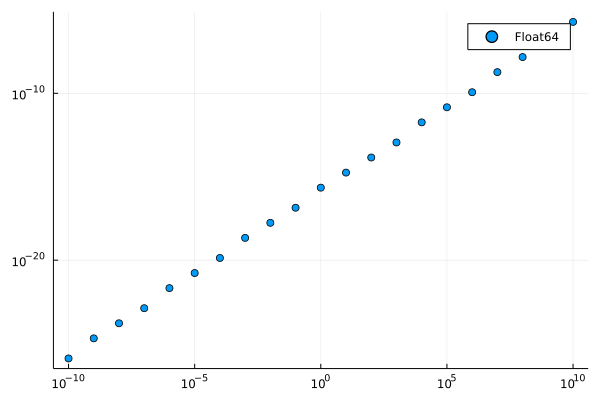

In [107]:
scatter(x,eps.(x),yscale=:log10, xscale=:log10, label="Float64")

In [108]:
eps(Float16(1))

Float16(0.000977)

In [109]:
x16 = [Float16(10.0)^i for i ∈ -4:4];

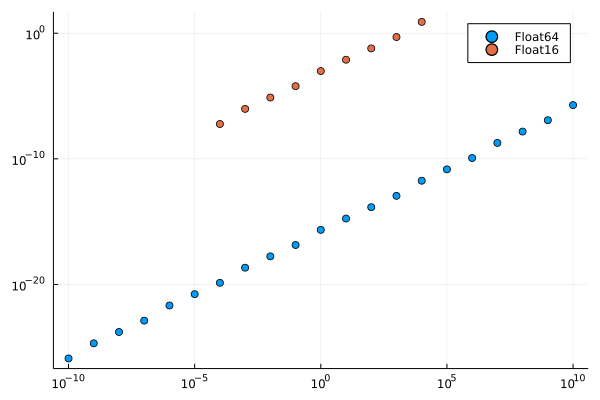

In [110]:
scatter!(x16,eps.(x16)
    , yscale=:log10
    , xscale=:log10
    , label="Float16"
)

## Los límites de la representación: 

El número finito más grande que podemos representar en Float64 es:

In [142]:
prevfloat(Inf)

1.7976931348623157e308

El más pequeño (en módulo):

In [143]:
nextfloat(0.)

5.0e-324

El primer número cercano a zero es un número denormalizado.

In [120]:
bitstring(eps(0.0))

"0000000000000000000000000000000000000000000000000000000000000001"

In [147]:
bitstring(eps(Float32(0.0)))

"00000000000000000000000000000001"

In [169]:
1 + eps(1.)*0.6 == 1.

false

In [170]:
bitstring(NaN)

"0111111111111000000000000000000000000000000000000000000000000000"

In [171]:
bitstring(Inf)

"0111111111110000000000000000000000000000000000000000000000000000"